<a href="https://colab.research.google.com/github/Mehmet-Bsg/various-projects/blob/main/classification_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying digits using a fully connected neural network

In this notebook, we build a fully connected neural network using keras library. The data base used to train the network is the MNIST database. The purpose is to classify digits

## Package imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.python.keras import backend as K
from tensorflow.keras.datasets import mnist as db
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix


%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2


(x, y), (x_test_ori, y_test_ori) = db.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## First look of the data


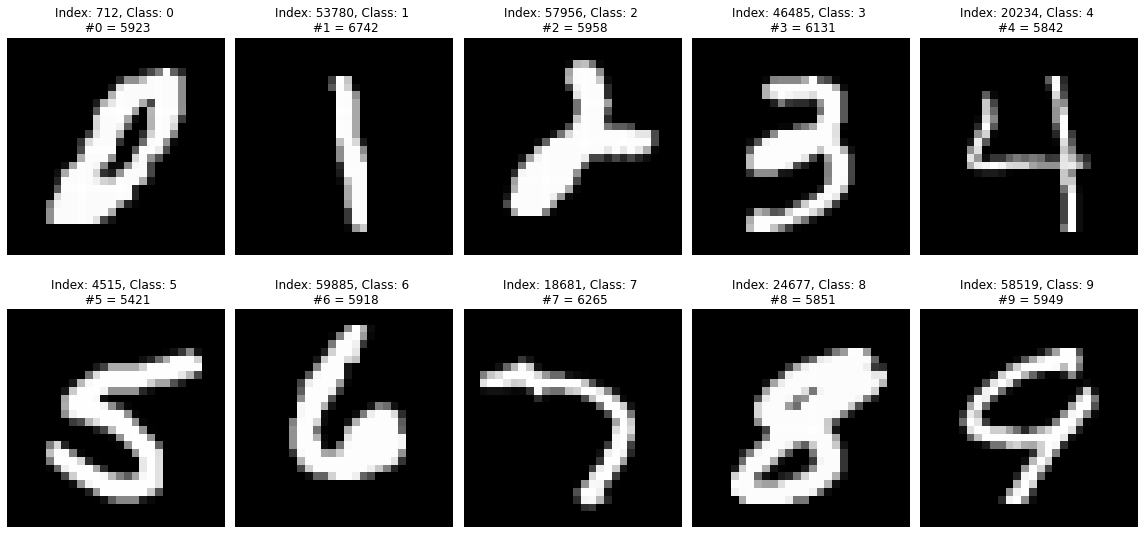

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
ax = ax.reshape(-1)

for i in range(10):
    class_mask = np.nonzero(y == i)[0]
    index = np.random.choice(class_mask)
    ax[i].imshow(x[index])
    ax[i].axis('off')
    ax[i].set_title(f"Index: {index}, Class: {y[index]} \n #{y[index]} = {class_mask.shape[0]}")

fig.tight_layout()

### Data preparation

<u>Splitting :</u> The training subset of the MNIST database contains 60000 images. We will split this set into an effective training set (90%) and a validation set (10%). This will allow us to improve our model without looking at the test set. As a rule of thumb the test should be evaluated very very few times, only when you think you have reach the end of your improvement procedure.

<u>Normalization :</u> We need to normalize the data before feeding it to the neural network, this is done simply by dividing the pixel values by 255.

<u>Formatting the input:</u> For the moment, the training data (the images) are stored in 2D arrays. Because we are using *Fully connected layers* (**FCL**), also called *Multi-Layer Perceptron* (**MLP**), we only need 1D vector as input. Thus we flatten the 2D arrays beforehand. 


<u>Formatting the output:</u> For the moment, the target is simply stored by assigning to each index of the y array, the corresponding digit value. Here our future **MLP** will compute an output tensor of 10 "probabilities" (between 0 and 1) for each image. Thus for an image of the digit 8 we would like output[7] to be equal to 1. To learn such a network we also need to format the y array into a relevant encoding. So we apply a *one-hot encoding* to each value stored in y :


In [3]:
# Data management
val_nb = 6000  # number of validation samples
nb_samples = x.shape[0]

if val_nb > nb_samples:
    raise ValueError("You need some samples to train your network!")

img_width, img_height = x.shape[1], x.shape[2]

num_of_pixels = img_width * img_height

# As we are using only fully connected layers, we need a vector as input
x = x.reshape(nb_samples, num_of_pixels)
x_test = x_test_ori.reshape(x_test_ori.shape[0], num_of_pixels)

# Normalization
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

# one-hot encoding of classes
num_classes = max(y) + 1
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test_ori, num_classes)


print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test_ori.shape, 'y test samples')

(54000, 784) x train samples
(6000, 784) x val samples
(10000, 784) x test samples
(54000, 10) y train samples
(6000, 10) y val samples
(10000,) y test samples


## First model

We will begin with a network containing a single layer. We use a softmax activation for our last and single layer in order to normalize the output tensor.


In [4]:
# let define a first simple model without any hidden layers
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(x_train.shape[1],)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Training


In [5]:
learning_rate = 0.01

def categorical_crossentropy(target, prediction):
    """ 
    target : array of shape [batch_size, num_classes]
    prediction : array of shape [batch_size, num_classes]
    """

    
    output = K.mean(-K.sum(target*K.log(prediction),axis=1))

    return output

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(learning_rate=learning_rate),
              metrics=['accuracy'])


batch_size = 128
epochs = 20
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val))



Epoch 1/20
422/422 [==============================] - 5s 4ms/step - loss: 1.3656 - accuracy: 0.6659 - val_loss: 0.8744 - val_accuracy: 0.8145
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.7585 - accuracy: 0.8308 - val_loss: 0.6465 - val_accuracy: 0.8530
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.6160 - accuracy: 0.8534 - val_loss: 0.5549 - val_accuracy: 0.8665
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5481 - accuracy: 0.8641 - val_loss: 0.5039 - val_accuracy: 0.8753
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.8716 - val_loss: 0.4702 - val_accuracy: 0.8797
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4790 - accuracy: 0.8768 - val_loss: 0.4465 - val_accuracy: 0.8842
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8806 - val_loss: 0.4284 - val_accuracy: 0.8877
Epoch 

### Is training satisfactory?



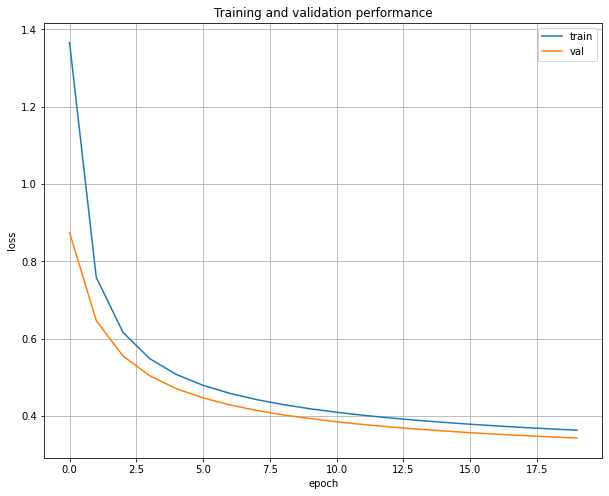

In [6]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

### some remarks

the learning could be improved as:
 
 1.the train loss and val loss are high, and the train loss is close to the val loss, so we are in the case of underfitting, we can try to use a model more complexe, change learning rate or change initialization for example.

2.the train loss and val loss are still descending, so  the training process doesn't finished yet, we can try to augment the epochs for training. 


There is no overfitting, as there is no very low training error and no large gap between
training and validation error



### Analysis of the weights

With this simple model it is possible to have an intuition of what the neural network has learned looking at
the matrix of the weights $W$. 
In fact $W\in\mathbb{R}^{784\times 10}$, so for each class $i$ we can plot the weights corresponding to this class.

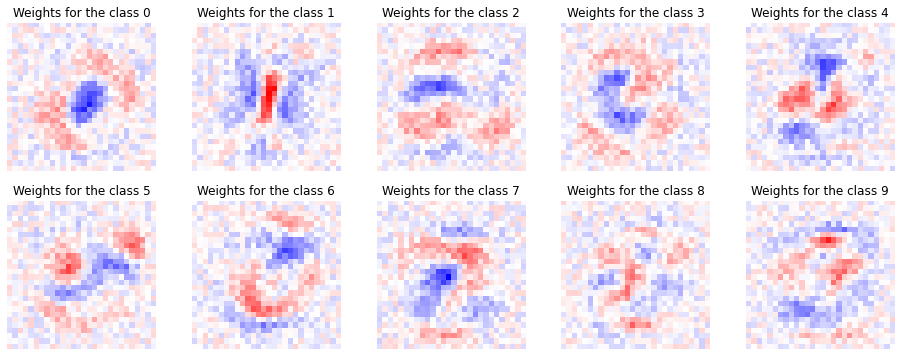

In [7]:
#plotting the weights 
W, b = model.layers[0].get_weights()
vmin = W.min()
vmax = W.max()
f, ax = plt.subplots(2, 5, figsize=(16,6))
for plt_row in range(2):
    for plt_col in range(5):
        ax[plt_row][plt_col].imshow(W[:,plt_row*5 + plt_col].reshape(img_width,img_height), vmin=vmin, vmax=vmax, cmap=plt.cm.bwr)
        ax[plt_row][plt_col].axis('off')
        ax[plt_row][plt_col].set_title("Weights for the class {}".format(plt_row*5 + plt_col))
plt.show()

## Improving performance by adding extra layers


In [8]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name="last"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 last (Dense)                (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [9]:
learning_rate = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

In [10]:
batch_size = 64
epochs = 40
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 1.2158 - accuracy: 0.6500 - val_loss: 0.4141 - val_accuracy: 0.8813
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3595 - accuracy: 0.8964 - val_loss: 0.2868 - val_accuracy: 0.9203
Epoch 3/40
844/844 [==============================] - 5s 6ms/step - loss: 0.2821 - accuracy: 0.9186 - val_loss: 0.2369 - val_accuracy: 0.9330
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2381 - accuracy: 0.9315 - val_loss: 0.2133 - val_accuracy: 0.9382
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2084 - accuracy: 0.9406 - val_loss: 0.1821 - val_accuracy: 0.9480
Epoch 6/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1858 - accuracy: 0.9461 - val_loss: 0.1682 - val_accuracy: 0.9513
Epoch 7/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1675 - accuracy: 0.9517 - val_loss: 0.1583 - val_accuracy: 0.9568
Epoch 

### Analysis of the results




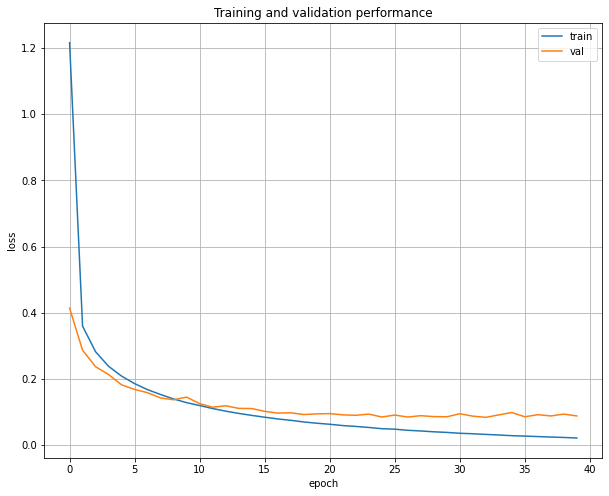

In [11]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()
# plt.ylim(0.2, 0.8)

### Some remarks
There is overfitting, as there is very low training error and large gap between training and validation error. We can reduce the overfitting by adding more data (or data augmentation), use model regularization etc.

### Qualitative error analysis

Let us have a look at some images that have been incorrectly classified. 

<u>Inference </u>: We call the predict method on our model and feed the x_test array to obtain the probabilities for each test sample. The y_predict_proba is a one-hot encoded array so we compute the index of the maximum predicted probability to extract the label of the predicted digit

In [12]:
y_predict_proba = model.predict(x_test)
y_predict = np.argmax(y_predict_proba, 1)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_test_ori != y_predict

array([False, False, False, ..., False, False, False])

Correct label is: 0
Predicted label is: 9 with a "probability" of 95.78%
Label 0 was predicted with a "probability" of 4.20%

Probabilities: [4.1962668e-02 1.3569301e-10 1.4615823e-07 6.1705963e-13 8.0574537e-05
 3.9236543e-09 5.1549428e-06 1.9205149e-04 9.8732762e-08 9.5775932e-01]


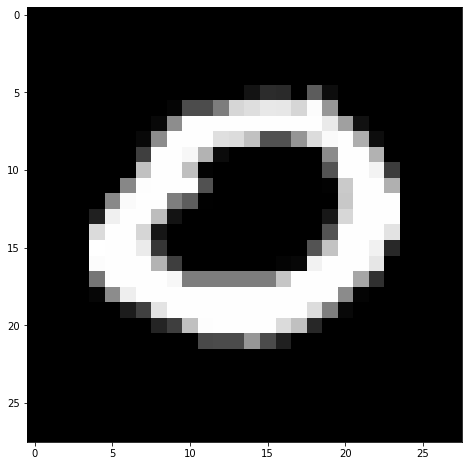

In [14]:
err_mask = y_test_ori != y_predict
ok_mask = y_test_ori == y_predict

x_test_errors = x_test_ori[err_mask]
y_test_errors = y_test_ori[err_mask]
y_predict_errors = y_predict[err_mask]
y_predict_proba_errors = y_predict_proba[err_mask]
y_predict_proba_ok = y_predict_proba[ok_mask]

index = np.random.choice(range(y_test_errors.shape[0]))
print(f"Correct label is: { y_test_errors[index]}")
print(f"Predicted label is: {y_predict_errors[index]} with a \"probability\" of {y_predict_proba_errors[index, y_predict_errors[index]]:.2%}")
print(f"Label {y_test_errors[index]} was predicted with a \"probability\" of {y_predict_proba_errors[index, y_test_errors[index]]:.2%}", end='\n\n')
print(f"Probabilities: {y_predict_proba_errors[index]}")
plt.imshow(x_test_errors[index], cmap="gray")
plt.show()

We can plot the histogram of the probabilities of the predicted classes, given that the predictions are correct or incorrect. This should give us some intuitions on how the network "behaves" during inference

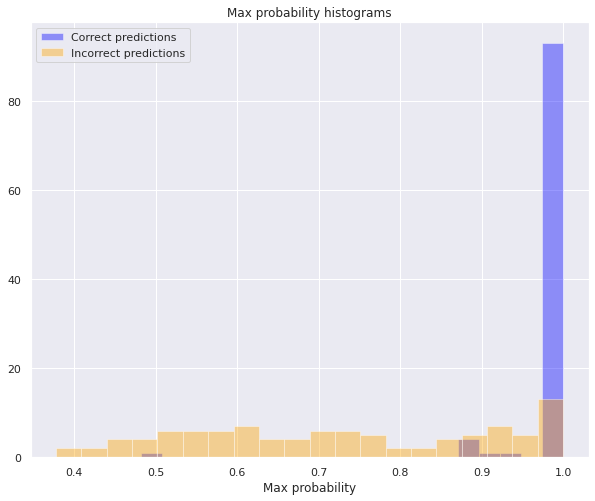

In [15]:


max_predictions_correct = np.max(y_predict_proba[ok_mask], 1)
max_predictions_incorrect = np.max(y_predict_proba[err_mask], 1)

#np.random.shuffle shuffles the values of the array
np.random.shuffle(max_predictions_correct)
np.random.shuffle(max_predictions_incorrect)

y_predict_proba_errors.shape

histo_bins = 20
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()

ax.hist(max_predictions_correct[0:100], density=False, 
         bins=histo_bins, 
         color="blue", 
         alpha=0.4, 
         label='Correct predictions')
ax.hist(max_predictions_incorrect[0:100],density=False, 
         bins=histo_bins, 
         color="orange", 
         alpha=0.4, 
         label='Incorrect predictions')

ax.set_title('Max probability histograms')
ax.set_xlabel("Max probability")
ax.legend()

sns.reset_defaults()


### Some remarks

The network is not "confident" when making errors. As shown in the histograms, the Max probability (which correspond to the probability of the prediction result) of the Incorrect predictions are distributed in the intervalle from 0,3 to 1, so for the Max probability of the Incorrect predictions relative low, the network is not sure about the prediction result, so it is not "confident" when making errors.


These errors could come from the digital handwritten numbers that are not easily distinguishable, as:
1. From the misclassified images shwon above, the ecritures shows irregularities in writing.
2. From the Max probability histograms above, the the network is not "confident" when making errors: the misclassified images may show poor distinguable features.

### Quantitative error analysis

In [16]:
def entropy(predictions):
    return - np.sum(predictions * np.log(predictions), axis=1)

We will plot the smoothed histogram (Kernel Density Estimation) of our predictions' entropy, given that the predictions are correct or incorrect.

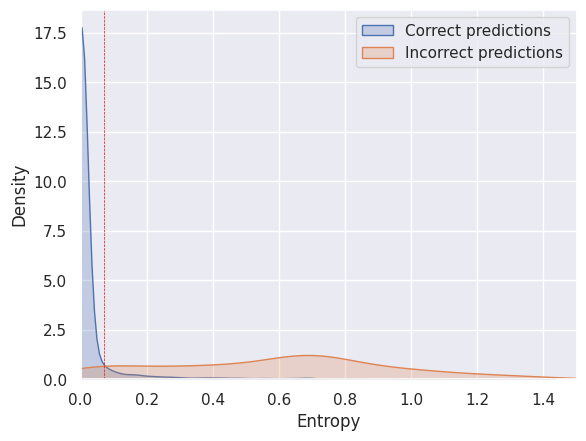

In [17]:
import seaborn as sns
sns.set_theme()

entropies = entropy(y_predict_proba)

fig, ax = plt.subplots()
sns.kdeplot(entropies[ok_mask], label='Correct predictions', ax=ax, fill=True)
sns.kdeplot(entropies[err_mask], label='Incorrect predictions',ax=ax, fill=True)
ax.set_xlim(0, 1.5)
ax.set_xlabel('Entropy')

ax.axvline(0.07, color='red', ls='--', lw=0.5)

ax.legend()

sns.reset_defaults()


### Some remarks

 Our model is uncertain about the incorrect predictions, and relatively certain about the correct predictions. 

Because for the correct predictions the entropy (uncertainty) concentrate near 0: the model is sure about the prediction result. But for the incorrect predictions, the entropy is  dispersed from 0 to 1: model is not certain about the prediction result.



1. Based on the entropies(err_mask) and entropies(ok_mask), we can calculate the threshhold of entropy ( intersection in the smoothed histogram ): threshhold_entropy (= 0.07 in our case) .
2. We take the prediction probability as input, and calculate the entropy of it. if the entropy calculated is superior than threshhold_entropy, then we class the prediction as wrong. if the entropy calculated is inferior than threshhold_entropy, then we class the prediction as correct.
3. The limits of the procedure is that, even if the entropy calculated is superior than threshhold_entropy, we can't garantee that the prediction MUST be wrong (the same with inferior), we can just make the judgement with a probabilitie relatively high, but can't be sure.

In [18]:
#estimating beforehand if a prediction will be wrong or not

! pip install sklearn
from sklearn.neighbors import KernelDensity
def procedure_estimate_prediction_beforehand():
  kde_ok = KernelDensity(kernel='tophat', bandwidth=0.75).fit(entropies[ok_mask].reshape(-1, 1))
  kde_error = KernelDensity(kernel='tophat', bandwidth=0.75).fit(entropies[err_mask].reshape(-1, 1))
  #threshold = np.where(kde_ok<kde_error)

####
procedure_estimate_prediction_beforehand()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=95d70f69148c23bf061b5315674013d5b56ed1fb32f93f3782eda0b07f7e6827
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


### Analysing the last layer

Evaluating the cosine between two vectors.


Shape of the weights array: (128, 10)


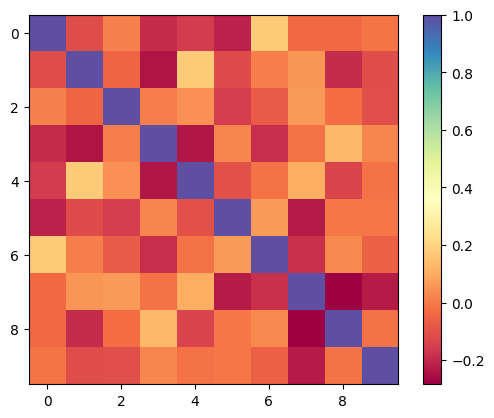

In [19]:
weights, bias = model.get_layer("last").get_weights()
print("Shape of the weights array:", weights.shape)
norms = []
for neuron in range(weights.shape[1]):
    norms += [np.linalg.norm(weights[:,neuron])]
weights /= norms

cos = np.matmul(weights.transpose(), weights)

plt.imshow(cos)
plt.set_cmap('Spectral')
plt.colorbar()
plt.show()

### Some remarks

 The classes 2 and 7 seems to be the most correlated, as their cos similarity if the highest among all cos similarities of different classes. Yes, I have expected this, as the structure of "2" and "7" are similar. 

### Improving the network 



In [20]:
val_acc_list = []
param_list = []
number_layers_list = [3,5,8]
number_neurons_per_layer_list = [64,128,256]


for number_layers in number_layers_list:
  for number_neurons_per_layer in number_neurons_per_layer_list:

    model = Sequential()

    
    #number_layers = 5
    #number_neurons_per_layer = 128

    model.add(Dense(number_neurons_per_layer, activation='relu', input_shape=(x_train.shape[1],)))
    for i in range(number_layers-2):
      model.add(Dense(number_neurons_per_layer, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', name="last"))

    ####

    model.summary()

    learning_rate = 0.01
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate),
                  metrics=['accuracy'])

    batch_size = 64
    epochs = 40
    output = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_val, y_val),
    )
    best_val_acc = max(output.history['val_accuracy'])
    val_acc_list.append(best_val_acc)
    param_list.append("number_layers=" + str(number_layers)+ " number_neurons_per_layer="+ str(number_neurons_per_layer))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 last (Dense)                (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 1.0117 - accuracy: 0.7396 - val_loss: 0.4529 - val_accuracy: 0.8827
Epoch 2/40
844/844 [==============================] - 3s 3ms/step - loss: 0.4093 - accuracy: 0.8872 - val_loss: 0.3409 - val_accuracy: 0.9077
Epoch 3/40
844/844 [==============================] - 3s 3ms/step - loss: 0.3416 - accuracy: 0.9025 - val_loss: 0.2987 - val_accuracy: 0.9175
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3065 - accuracy: 0.9117 - val_loss: 0.2744 - val_accuracy: 0.9243
Epoch 5/40
844/844 [==============================] - 5s 5ms/step - loss: 0.2814 - accuracy: 0.9200 - val_loss: 0.2548 - val_accuracy: 0.9292
Epoch 6/40
844/844 [==============================] - 5s 6ms/step - loss: 0.2614 - accuracy: 0.9246 - val_loss: 0.2382 - val_accuracy: 0.9337
Epoch 7/40
844/844 [==============================] - 6s 8ms/step - loss: 0.2448 - accuracy: 0.9301 - val_loss: 0.2248 - val_accuracy: 0.9368
Epoch 

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.9525 - accuracy: 0.7566 - val_loss: 0.4259 - val_accuracy: 0.8882
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3847 - accuracy: 0.8943 - val_loss: 0.3238 - val_accuracy: 0.9070
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3210 - accuracy: 0.9087 - val_loss: 0.2824 - val_accuracy: 0.9203
Epoch 4/40
844/844 [==============================] - 3s 3ms/step - loss: 0.2872 - accuracy: 0.9181 - val_loss: 0.2601 - val_accuracy: 0.9268
Epoch 5/40
844/844 [==============================] - 3s 3ms/step - loss: 0.2625 - accuracy: 0.9244 - val_loss: 0.2366 - val_accuracy: 0.9337
Epoch 6/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2429 - accuracy: 0.9300 - val_loss: 0.2205 - val_accuracy: 0.9383
Epoch 7/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2256 - accuracy: 0.9352 - val_loss: 0.2080 - val_accuracy: 0.9412
Epoch 

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.9069 - accuracy: 0.7797 - val_loss: 0.4092 - val_accuracy: 0.8950
Epoch 2/40
844/844 [==============================] - 3s 3ms/step - loss: 0.3695 - accuracy: 0.8962 - val_loss: 0.3121 - val_accuracy: 0.9132
Epoch 3/40
844/844 [==============================] - 3s 3ms/step - loss: 0.3087 - accuracy: 0.9123 - val_loss: 0.2759 - val_accuracy: 0.9240
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2759 - accuracy: 0.9215 - val_loss: 0.2493 - val_accuracy: 0.9318
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2521 - accuracy: 0.9276 - val_loss: 0.2326 - val_accuracy: 0.9367
Epoch 6/40
844/844 [==============================] - 3s 3ms/step - loss: 0.2325 - accuracy: 0.9339 - val_loss: 0.2166 - val_accuracy: 0.9390
Epoch 7/40
844/844 [==============================] - 3s 3ms/step - loss: 0.2161 - accuracy: 0.9386 - val_loss: 0.2062 - val_accuracy: 0.9432
Epoch 

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 1.4160 - accuracy: 0.5564 - val_loss: 0.5141 - val_accuracy: 0.8528
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.4114 - accuracy: 0.8788 - val_loss: 0.3234 - val_accuracy: 0.9082
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3117 - accuracy: 0.9081 - val_loss: 0.2664 - val_accuracy: 0.9263
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2643 - accuracy: 0.9213 - val_loss: 0.2289 - val_accuracy: 0.9350
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2316 - accuracy: 0.9313 - val_loss: 0.2083 - val_accuracy: 0.9388
Epoch 6/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2070 - accuracy: 0.9390 - val_loss: 0.1896 - val_accuracy: 0.9460
Epoch 7/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1875 - accuracy: 0.9446 - val_loss: 0.1741 - val_accuracy: 0.9480
Epoch 

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 1.1705 - accuracy: 0.6721 - val_loss: 0.4444 - val_accuracy: 0.8753
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3740 - accuracy: 0.8919 - val_loss: 0.3124 - val_accuracy: 0.9133
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2943 - accuracy: 0.9139 - val_loss: 0.2567 - val_accuracy: 0.9292
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2505 - accuracy: 0.9267 - val_loss: 0.2307 - val_accuracy: 0.9347
Epoch 5/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2186 - accuracy: 0.9368 - val_loss: 0.2048 - val_accuracy: 0.9443
Epoch 6/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1932 - accuracy: 0.9435 - val_loss: 0.1806 - val_accuracy: 0.9487
Epoch 7/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1731 - accuracy: 0.9498 - val_loss: 0.1673 - val_accuracy: 0.9525
Epoch 

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.9587 - accuracy: 0.7425 - val_loss: 0.3742 - val_accuracy: 0.8958
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3310 - accuracy: 0.9038 - val_loss: 0.2688 - val_accuracy: 0.9255
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2627 - accuracy: 0.9231 - val_loss: 0.2211 - val_accuracy: 0.9368
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2218 - accuracy: 0.9342 - val_loss: 0.1922 - val_accuracy: 0.9452
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1919 - accuracy: 0.9433 - val_loss: 0.1708 - val_accuracy: 0.9505
Epoch 6/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1694 - accuracy: 0.9505 - val_loss: 0.1643 - val_accuracy: 0.9515
Epoch 7/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1512 - accuracy: 0.9559 - val_loss: 0.1450 - val_accuracy: 0.9583
Epoch 

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 1.6373 - accuracy: 0.4470 - val_loss: 0.6728 - val_accuracy: 0.7858
Epoch 2/40
844/844 [==============================] - 4s 4ms/step - loss: 0.5162 - accuracy: 0.8438 - val_loss: 0.3856 - val_accuracy: 0.8900
Epoch 3/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3385 - accuracy: 0.9009 - val_loss: 0.2711 - val_accuracy: 0.9247
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2591 - accuracy: 0.9242 - val_loss: 0.2328 - val_accuracy: 0.9303
Epoch 5/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2123 - accuracy: 0.9373 - val_loss: 0.1873 - val_accuracy: 0.9465
Epoch 6/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1847 - accuracy: 0.9457 - val_loss: 0.1744 - val_accuracy: 0.9497
Epoch 7/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1632 - accuracy: 0.9518 - val_loss: 0.1566 - val_accuracy: 0.9567
Epoch 

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 1.5606 - accuracy: 0.4937 - val_loss: 0.5924 - val_accuracy: 0.8133
Epoch 2/40
844/844 [==============================] - 5s 5ms/step - loss: 0.4191 - accuracy: 0.8744 - val_loss: 0.3352 - val_accuracy: 0.8987
Epoch 3/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2910 - accuracy: 0.9137 - val_loss: 0.2477 - val_accuracy: 0.9252
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2296 - accuracy: 0.9311 - val_loss: 0.1909 - val_accuracy: 0.9442
Epoch 5/40
844/844 [==============================] - 5s 5ms/step - loss: 0.1913 - accuracy: 0.9426 - val_loss: 0.1706 - val_accuracy: 0.9510
Epoch 6/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1640 - accuracy: 0.9507 - val_loss: 0.1481 - val_accuracy: 0.9560
Epoch 7/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1437 - accuracy: 0.9577 - val_loss: 0.1454 - val_accuracy: 0.9548
Epoch 

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 1.3655 - accuracy: 0.5817 - val_loss: 0.4201 - val_accuracy: 0.8765
Epoch 2/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3516 - accuracy: 0.8945 - val_loss: 0.2576 - val_accuracy: 0.9265
Epoch 3/40
844/844 [==============================] - 5s 5ms/step - loss: 0.2452 - accuracy: 0.9281 - val_loss: 0.2088 - val_accuracy: 0.9393
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9430 - val_loss: 0.1707 - val_accuracy: 0.9498
Epoch 5/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1590 - accuracy: 0.9530 - val_loss: 0.1505 - val_accuracy: 0.9557
Epoch 6/40
844/844 [==============================] - 5s 5ms/step - loss: 0.1367 - accuracy: 0.9593 - val_loss: 0.1302 - val_accuracy: 0.9618
Epoch 7/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1175 - accuracy: 0.9646 - val_loss: 0.1233 - val_accuracy: 0.9638
Epoch 

In [21]:
val_acc_list

[0.971666693687439,
 0.9745000004768372,
 0.9756666421890259,
 0.9721666574478149,
 0.9768333435058594,
 0.9779999852180481,
 0.9714999794960022,
 0.9738333225250244,
 0.9783333539962769]

In [22]:
print("best paraneters are: " + str(param_list[val_acc_list.index(max(val_acc_list))]) + ",with best val accuray: "+ str(val_acc_list[val_acc_list.index(max(val_acc_list))]))

best paraneters are: number_layers=8 number_neurons_per_layer=256,with best val accuray: 0.9783333539962769


### Testing



In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 0.108
Test accuracy: 0.978


### Confusion matrix

Each value $C_{i,j}$ of the confusion matrix $C$ gives the number of elements known to belong to class $i$ that have been classified in class $j$.

In [24]:
y_pred_proba = model.predict(x_test)
y_pred = y_pred_proba.argmax(axis=-1)

confusion_matrix(y_test_ori, y_pred)

313/313 [==============================] - 1s 2ms/step


array([[ 971,    0,    0,    0,    1,    2,    1,    1,    2,    2],
       [   0, 1126,    3,    0,    0,    0,    2,    1,    3,    0],
       [   4,    3, 1008,    1,    3,    0,    0,    7,    5,    1],
       [   0,    0,    4,  990,    0,    5,    0,    3,    6,    2],
       [   1,    1,    5,    0,  954,    0,    5,    3,    0,   13],
       [   3,    0,    0,    9,    0,  868,    2,    1,    3,    6],
       [   4,    3,    0,    0,    6,    9,  934,    0,    2,    0],
       [   1,    7,    3,    2,    2,    0,    0, 1004,    4,    5],
       [   3,    0,    3,    8,    2,    5,    3,    3,  941,    6],
       [   1,    3,    0,    7,    6,    4,    1,    1,    6,  980]])

### Some remarks
 The pair 4 and 9 causes the most confusion. It is not very coherent with the analysis of the cosine similarity between neurons of the last layer. Because the cosine similarity between neurons of the last layer represent the caracteristics learned from the TRANING set, but there the confusion matrix is calculated based on the TEST set. So the difference here means the uneven distribution of data features in the training and test sets. 

## Using Convolutional Layers

Formatting input: since we are going to use convolutional layers we need image data. We can map images back to their original domain in a 28 x 28 grid

In [25]:
x_train = x_train.reshape([-1,28,28,1])
x_val = x_val.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

### Bulding the network

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

model = Sequential()


num_classes=10
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



####
model.build(input_shape=(1,28,28,1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 24, 24, 16)           416       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 12, 12, 16)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 10, 10, 32)           4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 5, 5, 32)            0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 3, 3, 32)             9248      
                                                                 
 flatten (Flatten)           (1, 288)                

In [27]:
learning_rate = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=learning_rate),
              metrics=['accuracy'])

In [28]:
batch_size = 64
epochs = 40
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Epoch 1/40
844/844 [==============================] - 12s 7ms/step - loss: 1.1673 - accuracy: 0.6565 - val_loss: 0.3194 - val_accuracy: 0.9008
Epoch 2/40
844/844 [==============================] - 9s 10ms/step - loss: 0.2617 - accuracy: 0.9210 - val_loss: 0.1944 - val_accuracy: 0.9437
Epoch 3/40
844/844 [==============================] - 8s 9ms/step - loss: 0.1722 - accuracy: 0.9479 - val_loss: 0.1368 - val_accuracy: 0.9592
Epoch 4/40
844/844 [==============================] - 7s 8ms/step - loss: 0.1318 - accuracy: 0.9596 - val_loss: 0.1190 - val_accuracy: 0.9653
Epoch 5/40
844/844 [==============================] - 6s 7ms/step - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.1063 - val_accuracy: 0.9677
Epoch 6/40
844/844 [==============================] - 4s 5ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.0798 - val_accuracy: 0.9775
Epoch 7/40
844/844 [==============================] - 4s 5ms/step - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.0786 - val_accuracy: 0.9785
Epoc

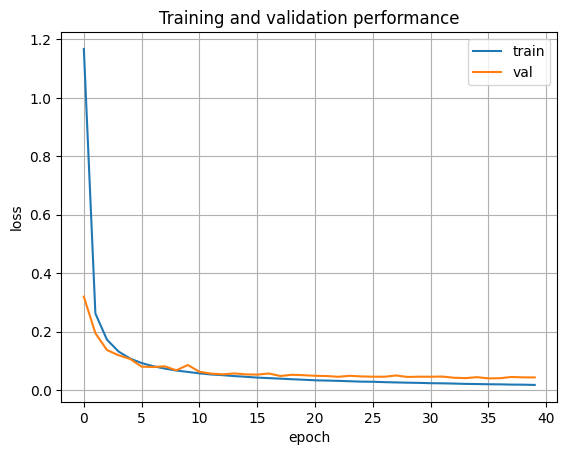

In [29]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()
# plt.ylim(0.2, 0.8)

### Some remarks :
there is overfitting. Compare with denser architecture, the overfitting is more serious: the train loss is very close to 0, and there is larger gap between training and validation error. We can add regularization iterms (or batch normalization layers).

# Visualizing the Feature Maps
Here we vizualize the feature maps of the first layer for some images.

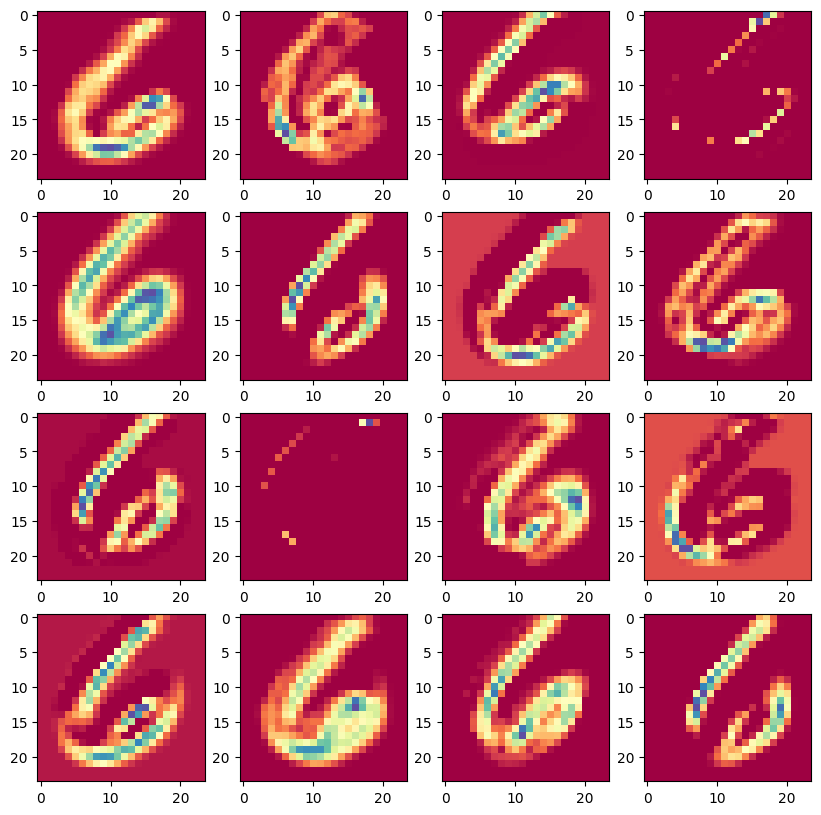

In [30]:
im = x_test[np.random.randint(0, x_test.shape[0]), :, :, :]
im = im[np.newaxis, ...]
fmaps = model.layers[0](im)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(fmaps[0,:,:,i])

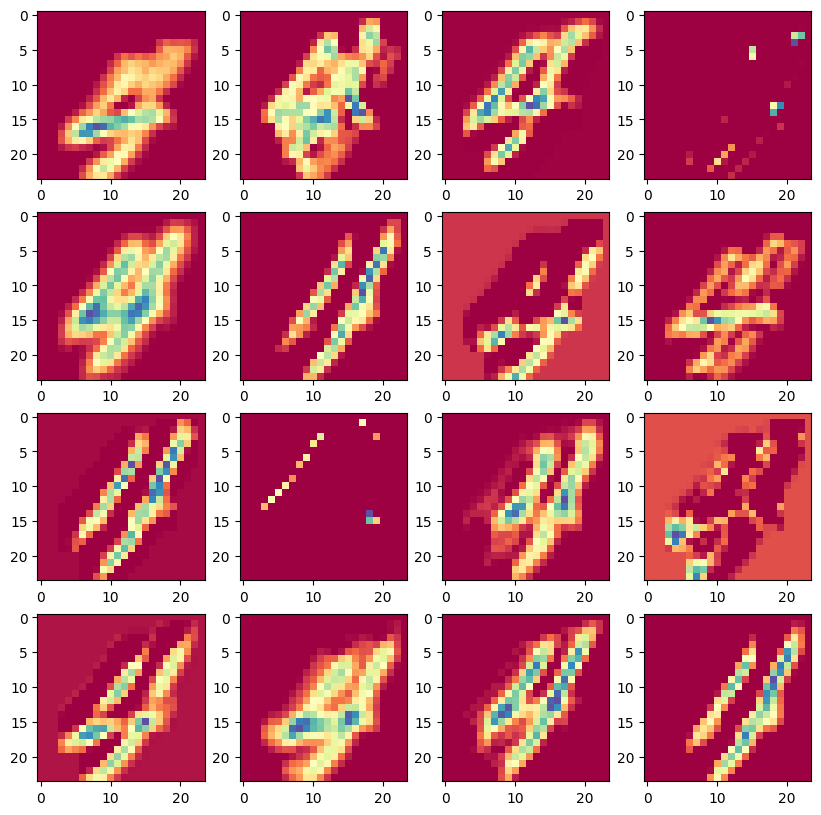

In [31]:
im = x_test[np.random.randint(0, x_test.shape[0]), :, :, :]
im = im[np.newaxis, ...]
fmaps = model.layers[0](im)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(fmaps[0,:,:,i])

# Improving the network
Trying to improve the network by changing the number of layers of each type and the number of feature maps, neurons or kernel size.

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,BatchNormalization

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
BatchNormalization()
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dense(num_classes, activation='softmax'))

model.build(input_shape=(1,28,28,1))

#####

model.summary()

learning_rate = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=learning_rate),
              metrics=['accuracy'])

batch_size = 64
epochs = 40
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (1, 26, 26, 16)           160       
                                                                 
 conv2d_4 (Conv2D)           (1, 24, 24, 16)           2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (1, 12, 12, 16)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (1, 10, 10, 32)           4640      
                                                                 
 conv2d_6 (Conv2D)           (1, 8, 8, 32)             9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (1, 4, 4, 32)            0         
 2D)                                                 

# Experimenting with a more complex database

In [33]:
from tensorflow.keras.datasets import fashion_mnist as db

#labelling the data
fashion_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }


4422102/4422102 [==============================] - 0s 0us/step


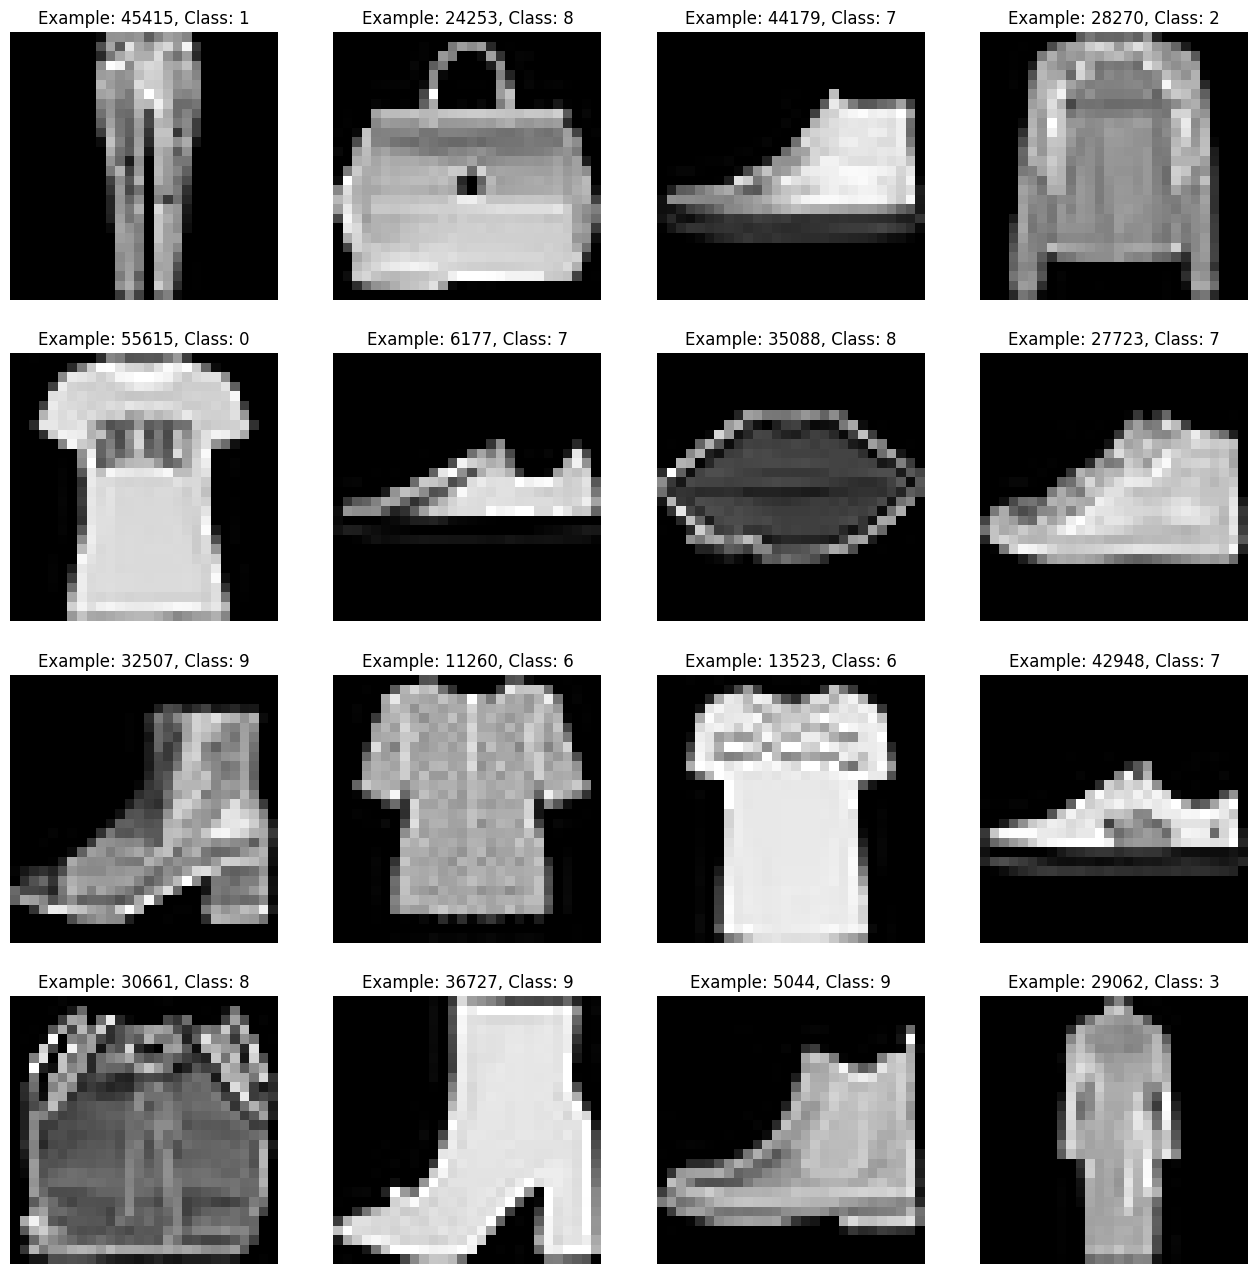

(60000, 28, 28)

In [34]:
(x, y), (x_test_ori, y_test_ori) = db.load_data()


plt_r,plt_c = 4,4
f, ax = plt.subplots(plt_r, plt_c, figsize=(16,16))
for i in range(plt_r):
    for j in range(plt_c):
        index = np.random.randint(x.shape[0])
        ax[i][j].imshow(x[index], cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title("Example: {}, Class: {}".format(index, y[index]))
plt.show()
x.shape

# Bulding the model


In [35]:
# Data management
val_nb = 6000  # number of validation samples
nb_samples = x.shape[0]

if val_nb > nb_samples:
    raise ValueError("You need some samples to train your network!")
img_width, img_height = x.shape[1], x.shape[2]

num_of_pixels = img_width * img_height

# As we are using only fully connected layers, we need a vector as input
x = x.reshape(nb_samples, num_of_pixels)
x_test = x_test_ori.reshape(x_test_ori.shape[0], num_of_pixels)

# Normalization
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

# one-hot encoding of classes
num_classes = max(y) + 1
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test_ori, num_classes)


x_train = x_train.reshape([-1,28,28,1])
x_val = x_val.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])


print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test_ori.shape, 'y test samples')

(54000, 28, 28, 1) x train samples
(6000, 28, 28, 1) x val samples
(10000, 28, 28, 1) x test samples
(54000, 10) y train samples
(6000, 10) y val samples
(10000,) y test samples


In [36]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,BatchNormalization

model = Sequential()

num_classes=10
model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
BatchNormalization(axis=-1)
model.add(Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
BatchNormalization()
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dense(num_classes, activation='softmax'))

model.build(input_shape=(1,28,28,1))


model.summary()

learning_rate = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=learning_rate),
              metrics=['accuracy'])

batch_size = 64
epochs = 40
output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (1, 26, 26, 16)           160       
                                                                 
 conv2d_8 (Conv2D)           (1, 24, 24, 16)           2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (1, 12, 12, 16)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (1, 10, 10, 32)           4640      
                                                                 
 conv2d_10 (Conv2D)          (1, 8, 8, 32)             9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (1, 4, 4, 32)            0         
 2D)                                                 

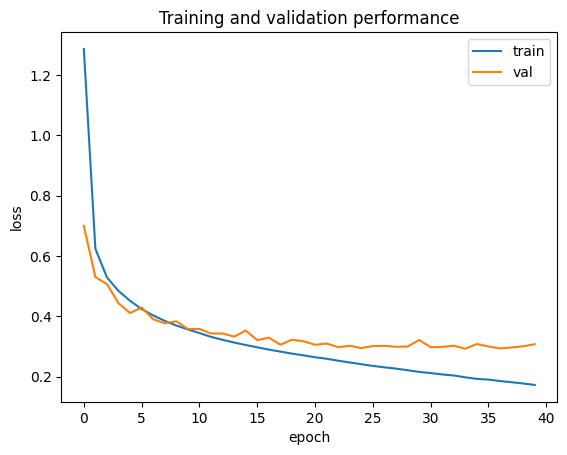

In [37]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid
plt.show()